In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
Y = data['Channel']
X= data.drop(['Channel'],axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [13]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [9]:
pred_y = kmeans.fit_predict(X)

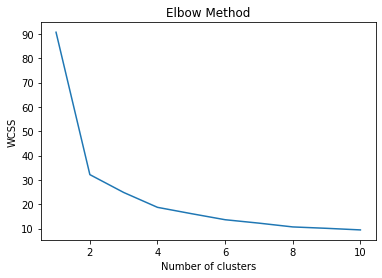

In [14]:
wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

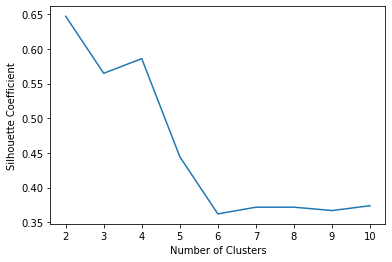

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for i in range(2, 11):
    Agg = AgglomerativeClustering(n_clusters = i)
    Agg.fit(X)
    score = silhouette_score(X, Agg.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
Agg = AgglomerativeClustering(n_clusters = 2)
Agg.fit(X)

AgglomerativeClustering()